In [4]:
import pandas as pd

In [5]:
import os
print(os.getcwd())  # This will print the current working directory

/Users/mac/Documents/Data Science/Online Retail Data Set


In [6]:
import pandas as pd

# Use the absolute path to read the CSV file with a different encoding
file_path = '/Users/mac/Documents/Data Science/Online Retail Data Set/OnlineRetail.csv'

# Read the CSV file using ISO-8859-1 encoding
transaction_df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)


In [7]:
# Displaying the first few rows of the data
transaction_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Displaying the shape (number of rows and columns) of the dataframe
transaction_df.shape

(541909, 8)

In [9]:
# Check and count the number of missing values (NaN) in each column of the dataframe
transaction_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Remove rows with missing values (NaN) from the DataFrame
transaction_df.dropna(inplace=True)

In [11]:
# Check for null values
transaction_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Displaying information about the DataFrame, including data types, non-null values, and memory usage
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
# Remove rows where InvoiceNo starts with non-numeric characters
transaction_df_clean = transaction_df[transaction_df['InvoiceNo'].str.isdigit()].copy()


In [14]:
# Safely convert InvoiceNo to integer using .loc
transaction_df_clean.loc[:, 'InvoiceNo'] = transaction_df_clean['InvoiceNo'].astype(int)


In [15]:
# Verify the conversion
print(transaction_df_clean['InvoiceNo'].dtype)

object


In [16]:
# Converting InvoiceDate from object to datetime
transaction_df['InvoiceDate'] = pd.to_datetime(transaction_df['InvoiceDate'])

In [17]:
# Converting Country from object to string
transaction_df['Country'] = transaction_df['Country'].astype(str)

In [18]:
# Converting Country from object to string
transaction_df['Country'] = transaction_df['Country'].astype(str)

In [19]:
# Displaying the first few rows
transaction_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
# Checking the data types for all the columns
transaction_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [21]:
# To check if all the numeric values in the dataframe are proper or not, we will use the describe method
transaction_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [22]:
# Calculate the total amount spent for each transaction and add it as a new column
transaction_df['AmountSpent'] = transaction_df['Quantity'] * transaction_df['UnitPrice']


In [23]:
# Check if 'AmountSpent' is listed in the columns
print(transaction_df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'AmountSpent'],
      dtype='object')


In [24]:
# Checking the data types for all the columns
transaction_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
AmountSpent           float64
dtype: object

In [25]:
# Ensure that the 'AmountSpent' column contains only positive values
# by taking the absolute value of each entry
transaction_df['AmountSpent'] = transaction_df['AmountSpent'].abs()

In [26]:
# Let's check the numeric value again
transaction_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,AmountSpent
count,406829.000000,406829,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,23.407255
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.680000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.800000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,427.437730


In [27]:
# Yay! the dataset is now clean. Let's save the cleaned dataset as a new CSV file
transaction_df.to_csv('/Users/mac/Documents/Data Science/Online Retail Data Set/customer_dataset.csv', header=True, index=False)

In [28]:
#2. Performing Customer Analytics

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
# Read the CSV file as panda dataframe
customer_df = pd.read_csv ('/Users/mac/Documents/Data Science/Online Retail Data Set/customer_dataset.csv')

In [31]:
# Displaying the first few rows of the data
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
# Displaying the number of rows and columns of the dataframe
customer_df.shape

(406829, 9)

In [33]:
# Printing the no of unique data values
customer_df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
AmountSpent     3027
dtype: int64

In [34]:
# Getting the total no of unique customers per country
customer_df.groupby(['Country'])[['CustomerID']].nunique()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


In [35]:
# Assigning variable to the total number of unique customers per country
df_country = customer_df.groupby(['Country'])[['CustomerID']].nunique()

In [36]:
# Renaming the column names
df_country.columns = ['no_of_customers']

# Sorting the dataset based on number of customers
df_country = df_country.sort_values('no_of_customers', ascending=False)

# Displaying the first few rows
df_country.head()

,no_of_customers
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25


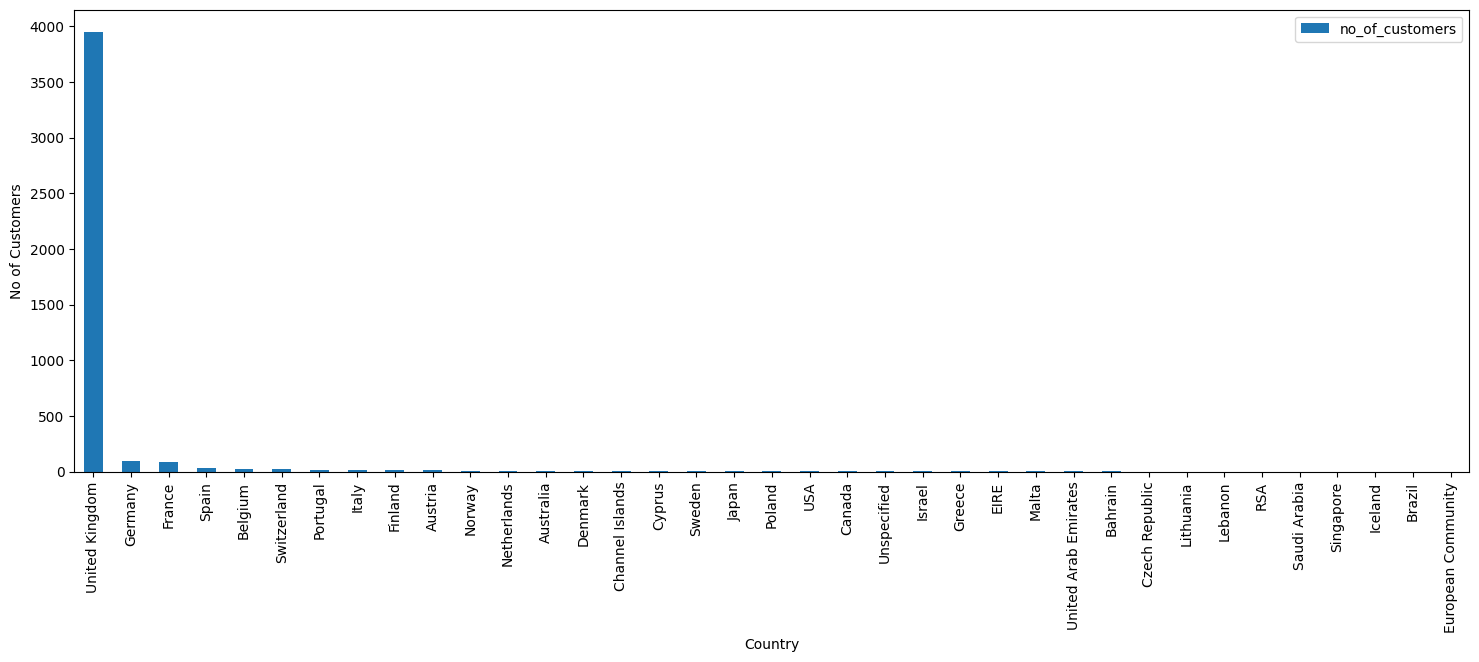

In [37]:
# Visualizing the number of customers per country in a bar plot
# Plotting a bar plot
df_country.plot(kind='bar', figsize = (18, 6))
plt.ylabel('No of Customers')
plt.show()


In [38]:
# Displaying the first few rows
customer_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [39]:
# Getting only the year and month from the InvoiceDate column
pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
406824    2011-12
406825    2011-12
406826    2011-12
406827    2011-12
406828    2011-12
Name: InvoiceDate, Length: 406829, dtype: object

In [40]:
# Assigning the year and month to a new column named "InvoiceYearMonth"
customer_df['InvoiceYearMonth'] = pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

In [41]:
# Displaying the first few rows
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [42]:
# Getting the total revenue per month per year
df_revenue = customer_df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()

In [43]:
# Displaying the first few rows
df_revenue

,AmountSpent
InvoiceYearMonth,
2010-12,590823.760
2011-01,663815.700
2011-02,457728.550
2011-03,611036.910
2011-04,512352.871
2011-05,708938.040
2011-06,714414.220
2011-07,625943.541
2011-08,674319.800


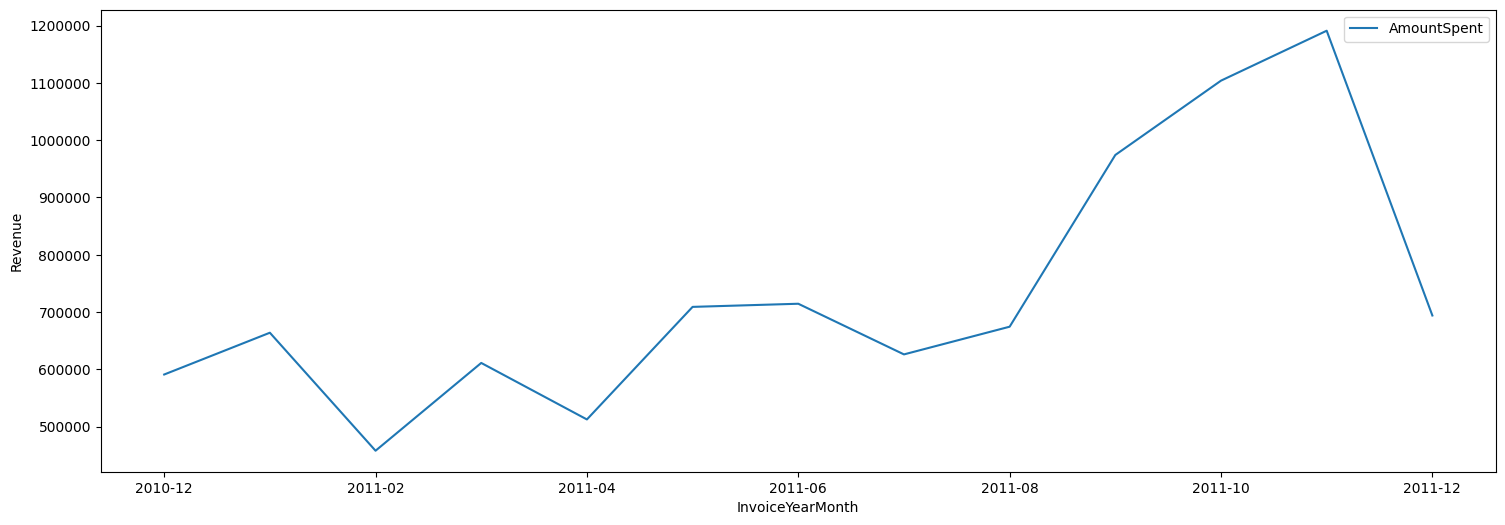

In [44]:
# plotting a line plot
fig, ax = plt.subplots(figsize=(18, 6))

df_revenue.plot(kind='line', ax=ax)

# Disable scientific notation on the y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.ylabel('Revenue')

# Display the plot
plt.show()


In [45]:
# Exploring the data further. Checking for the last date data was collected 
customer_df['InvoiceDate'].max()


'2011-12-09 12:50:00'

In [46]:
# Creating monthly active customers
df_monthly_active = customer_df.groupby(['InvoiceYearMonth'])[['CustomerID']].nunique()

In [47]:
# Renaming the column name
df_monthly_active.columns = ['No_of_Unique_Customers']

# Displaying the rows
df_monthly_active


,No_of_Unique_Customers
InvoiceYearMonth,
2010-12,948
2011-01,783
2011-02,798
2011-03,1020
2011-04,899
2011-05,1079
2011-06,1051
2011-07,993
2011-08,980


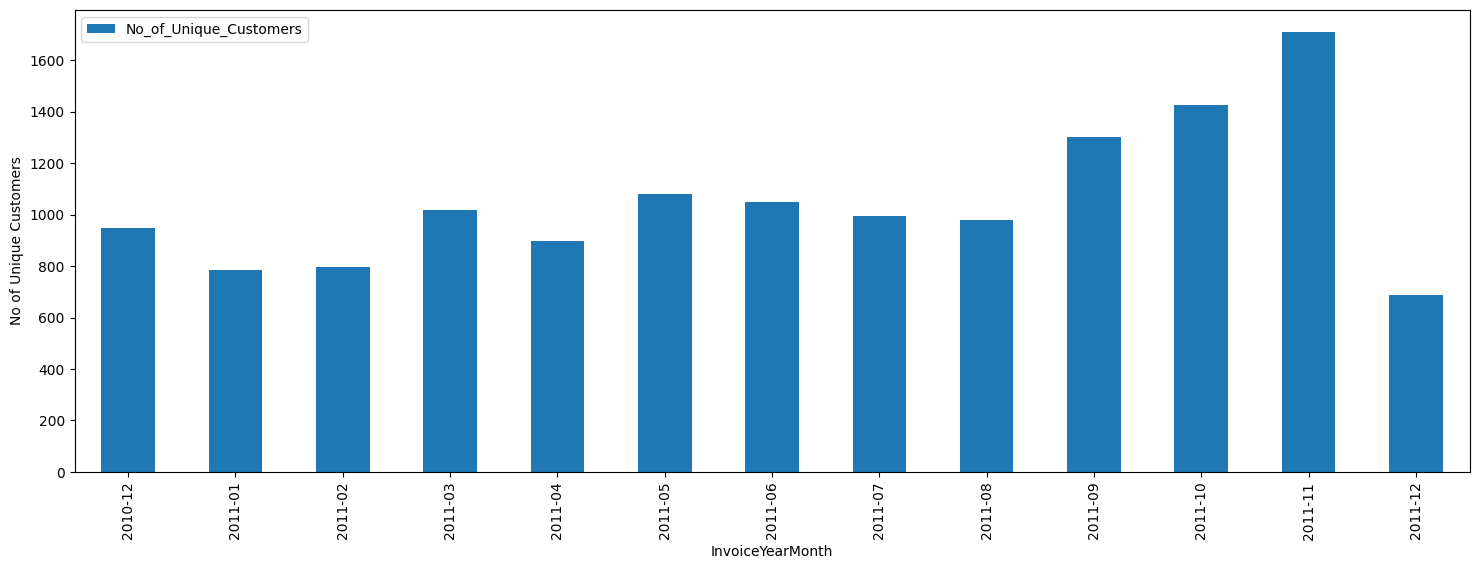

In [48]:
# Plotting a bar plot
df_monthly_active.plot(kind='bar', figsize = (18, 6))
plt.ylabel('No of Unique Customers')
plt.show()

In [49]:
# Merge the dataframes based on the common 'InvoiceYearMonth' column
merged_df = pd.merge(df_revenue, df_monthly_active, on='InvoiceYearMonth')

# Calculate the correlation coefficient between AmountSpent and No of Unique Customers
correlation = merged_df['AmountSpent'].corr(merged_df['No_of_Unique_Customers'])

print("Correlation between AmountSpent and No of Unique Customers:", correlation)

Correlation between AmountSpent and No of Unique Customers: 0.890647133908263


Interpretation:

The correlation value of 0.8906 between AmountSpent and Number of Unique Customers indicates a strong positive relationship between the two variables. This means that as the number of unique customers increases, the amount spent by the customers also tends to increase proportionally.

What this suggests:
Customer Growth Drives Revenue: An increase in the number of unique customers is closely linked to higher spending. This suggests that expanding the customer base directly boosts revenue.

Marketing & Acquisition Effectiveness: Efforts to acquire new customers are likely paying off in terms of higher overall sales.

Potential for Revenue Growth: Since the correlation is not 1.0 (perfect), while the two variables are highly correlated, there is still room to improve the amount spent by customers (e.g., through upselling or increasing average order value) even if the number of unique customers remains stable.

**Checking the impact of customer growth on revenue using regression analysis**

In [50]:
!pip install statsmodels

In [51]:
import statsmodels.formula.api as smf

merged_df.head()

,AmountSpent,No_of_Unique_Customers
InvoiceYearMonth,,
2010-12,590823.760,948
2011-01,663815.700,783
2011-02,457728.550,798
2011-03,611036.910,1020
2011-04,512352.871,899


In [52]:
merged_df.columns

Index(['AmountSpent', 'No_of_Unique_Customers'], dtype='object')

In [53]:
# Define the regression model
model = smf.ols("AmountSpent ~ No_of_Unique_Customers", data=merged_df)

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     42.20
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.45e-05
Time:                        23:12:07   Log-Likelihood:                -167.67
No. Observations:                  13   AIC:                             339.3
Df Residuals:                      11   BIC:                             340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3728

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [54]:
# Extract the coefficient of 'No of Unique Customers'
customer_impact = results.params["No_of_Unique_Customers"]

print("Estimated impact of one additional customer on revenue:", customer_impact)

Estimated impact of one additional customer on revenue: 699.9066313049045


The OLS regression analysis reveals a strong and statistically significant positive relationship between the Number of Unique Customers and the Amount Spent. Specifically, the model shows that for each additional unique customer, the amount spent increases by approximately 700 units. This is supported by a high R-squared value of 0.793, indicating that 79.3% of the variation in spending is explained by the number of unique customers. The coefficient for the number of unique customers is highly significant with a p-value of 0.000, confirming that this predictor has a substantial impact on revenue. The overall model is statistically significant, as evidenced by an F-statistic of 42.20 and a very low p-value of 4.45e-05. The residuals appear to be normally distributed, although there is some mild autocorrelation indicated by a Durbin-Watson statistic of 1.338.

**3. Finding Recency, Frequency, and Monetary Value of Customers (RFM Analysis)**

Recency: When did each customer make their last purchase?

Frequency: How many times did each customer make a purchase?

Monetary Value: How much did each unique customer spend in total?

**Finding Recency of Customers**
The first thing to do is to answer the following question - When did each customer make their last purchase? (Recency)

In [55]:
# Sorting the dataframe based on the InvoiceDate column
customer_df.sort_values('InvoiceDate', inplace=True)

In [56]:
user_df = customer_df.drop_duplicates('CustomerID', keep='last').reset_index(drop=True)

# Displaying the first few rows
user_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvoiceYearMonth
0,536384,22470,HEART OF WICKER LARGE,40,2010-12-01 09:53:00,2.55,18074.0,United Kingdom,102.00,2010-12
1,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,9.95,13747.0,United Kingdom,79.60,2010-12
2,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,15.00,2010-12
3,536409,22531,MAGIC DRAWING SLATE CIRCUS PARADE,1,2010-12-01 11:45:00,0.42,17908.0,United Kingdom,0.42,2010-12
4,536420,21715,GIRLS VINTAGE TIN SEASIDE BUCKET,8,2010-12-01 12:03:00,2.55,16583.0,United Kingdom,20.40,2010-12


In [57]:
# Finding the recency of each customer in respect to the last date of purchase in the dataset
user_df['Recency'] = pd.to_datetime(user_df['InvoiceDate'].max()) - pd.to_datetime(user_df['InvoiceDate'])

# Displaying the first few rows
user_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvoiceYearMonth,Recency
0,536384,22470,HEART OF WICKER LARGE,40,2010-12-01 09:53:00,2.55,18074.0,United Kingdom,102.00,2010-12,373 days 02:57:00
1,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,9.95,13747.0,United Kingdom,79.60,2010-12,373 days 02:13:00
2,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,15.00,2010-12,373 days 01:23:00
3,536409,22531,MAGIC DRAWING SLATE CIRCUS PARADE,1,2010-12-01 11:45:00,0.42,17908.0,United Kingdom,0.42,2010-12,373 days 01:05:00
4,536420,21715,GIRLS VINTAGE TIN SEASIDE BUCKET,8,2010-12-01 12:03:00,2.55,16583.0,United Kingdom,20.40,2010-12,373 days 00:47:00


In [58]:
# Extracting only the day value
user_df['Recency'] = user_df['Recency'].dt.days

In [59]:
# Selecting only the customerID and Recency column
user_df = user_df[['CustomerID', 'Recency']]

In [60]:
# Displaying the first few rows
user_df.head()

,CustomerID,Recency
0,18074.0,373
1,13747.0,373
2,12791.0,373
3,17908.0,373
4,16583.0,373


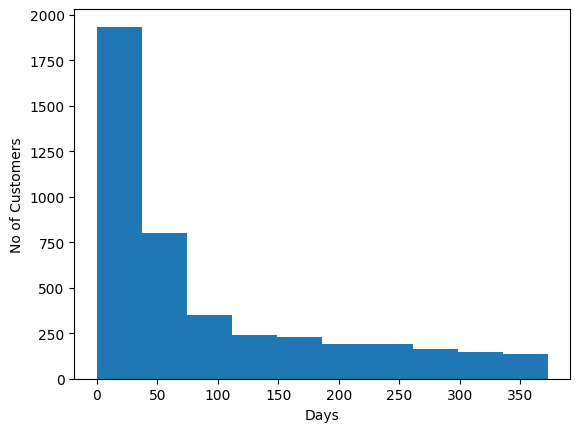

In [61]:
# Plotting the frequency distribution of all days
plt.hist(user_df['Recency'])
plt.ylabel('No of Customers')
plt.xlabel('Days')
plt.show()

Result:
Based on the above chart, most customers have made a purchase within the last 50 days, indicating that the majority of customers are still active and engaged with the store. This points to a healthy customer base with frequent purchase activity, which is crucial for sustaining revenue and long-term business growth.

Implications:
Customer Retention: The fact that most customers are purchasing within a relatively short timeframe (50 days) suggests effective customer retention strategies or strong customer loyalty.

Engagement Opportunities: With many active customers, there’s an opportunity to further engage these customers with targeted marketing campaigns, promotions, or loyalty programs to increase their purchase frequency or average order value.

**Finding Purchase Frequency of Customers**

Here, let's answer the following question - How many times did each unique customer make a purchase? (Frequency)

In [62]:
# Displaying the first few rows of customer dataframe
customer_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [63]:
# Getting the frequency distribution of each CustomerID
df_frequency = customer_df['CustomerID'].value_counts().reset_index()

# Renaming the columns
df_frequency.columns = ['CustomerID', 'Frequency']

# Displaying the first few rows
df_frequency.head()

,CustomerID,Frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782


In [64]:
# Merging the df_frequency with user_df based on the common 'CustomerID' column
user_df = pd.merge(user_df, df_frequency, on='CustomerID')

# Displaying the first few rows
user_df.head(10)

,CustomerID,Recency,Frequency
0,18074.0,373,13
1,13747.0,373,1
2,12791.0,373,2
3,17908.0,373,58
4,16583.0,373,14
5,17968.0,373,85
6,14729.0,373,71
7,14237.0,372,9
8,15350.0,372,5
9,15165.0,372,27


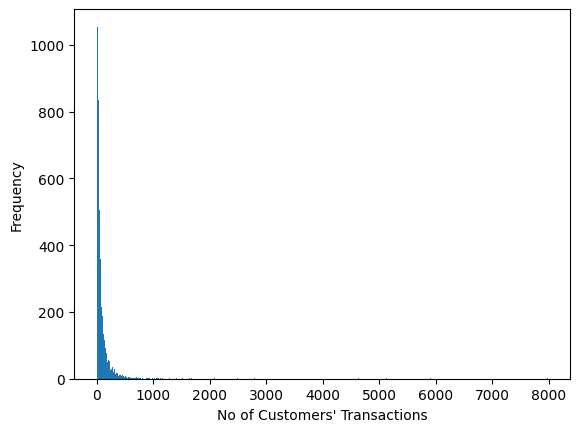

In [65]:
# Plotting the frequency distribution of the frequency
plt.hist(user_df['Frequency'], bins=500)
plt.ylabel('Frequency')
plt.xlabel('No of Customers\' Transactions')
plt.show()


Since the histogram is not clearly outlining the outliers, let's make a scatter plot

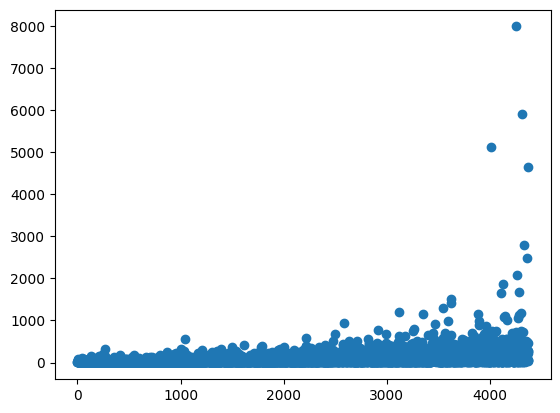

In [66]:
# Plotting the scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Frequency'])


The scatter plot reveals that most unique customers have made purchases between 1 and 1,000 times, indicating a typical purchase pattern for the majority of the customer base. However, there are also some outlier customers who have made purchases more than 1,000 times, suggesting they are extremely frequent buyers.

Key Insights:
Core Customer Behavior: The bulk of customers fall within the 1–1,000 purchase range, which may represent typical shopping behavior for the majority of the store's users.

Outliers: The few customers who have made more than 1,000 purchases stand out as highly engaged or loyal customers. These outliers could be repeat bulk buyers, VIP customers, or power users that contribute significantly to revenue.

Opportunities: For the regular customers (1-1,000 purchases), personalized offers can encourage more frequent purchases. Meanwhile, the outliers may represent opportunities for exclusive rewards programs to further strengthen their loyalty.

**Finding Monetary Value of Customers**

Here, let's answer the following question - How much did each unique customer spend in total? (Monetary Value)


In [67]:
# Displaying the first few rows of customer's dataframe
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [68]:
# Getting the total amount spent by each customer
df_amount = customer_df.groupby('CustomerID')['AmountSpent'].sum().reset_index()

In [69]:
# Displaying the first few rows
df_amount.head()

,CustomerID,AmountSpent
0,12346.0,154367.20
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [70]:
# Renaming the column name as Revenue
df_amount.columns = ['CustomerID', 'Revenue']
df_amount.head()

,CustomerID,Revenue
0,12346.0,154367.20
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [71]:
# Merging the df_amount with user_df based on the common 'CustomerID' column
user_df = pd.merge(user_df, df_amount, on='CustomerID')


In [72]:
# Displaying the first few rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue
0,18074.0,373,13,489.60
1,13747.0,373,1,79.60
2,12791.0,373,2,192.60
3,17908.0,373,58,243.28
4,16583.0,373,14,233.45


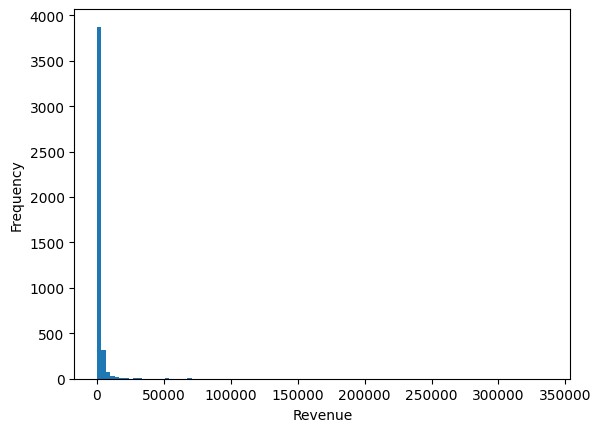

In [73]:
# Plotting the frequency distribution of the totam amount spent
plt.hist(user_df['Revenue'], bins=100)
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.show()

Since histogram is not clearly outlining the outliers, let's make a scater plot as well


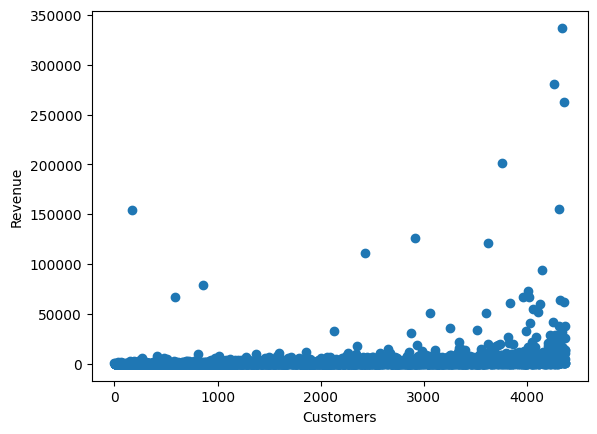

In [74]:
# Plotting a scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Revenue'])
plt.ylabel('Revenue')
plt.xlabel('Customers')
plt.show()

The scatter plot shows that most customers have made purchases amounting to less than 50,000 units, indicating that the majority of the store's customers fall within this spending range. However, there are some outlier customers who have made purchases exceeding 50,000 units, which highlights significant deviations from the norm.

Insights:
Majority Spending Behavior: The bulk of customers spend less than 50,000 units, representing typical purchasing patterns for the store.

Outliers: A few customers have spent over 50,000 units, marking them as exceptionally high-value customers. These outliers could be critical to the store's overall revenue and may deserve special attention.

Potential Actions: The store could focus on retaining high-value customers by offering them personalized incentives, while encouraging regular customers to increase their spending through targeted promotions.



In [75]:
# Saving the user_df as a new csv file
user_df.to_csv('/Users/mac/Documents/Data Science/Online Retail Data Set/user_dataset.csv', header=True, index=False)

Analyzing the correlation between the Recency, Frequency and Monetary Value distribution of all the customers using a correlation matrix

In [76]:
# Calculate the correlation matrix
correlation_matrix = user_df.corr()

# Print the correlation matrix
correlation_matrix

,CustomerID,Recency,Frequency,Revenue
CustomerID,1.000000,0.013687,-0.002786,-0.013250
Recency,0.013687,1.000000,-0.206980,-0.105736
Frequency,-0.002786,-0.206980,1.000000,0.377823
Revenue,-0.013250,-0.105736,0.377823,1.000000


The correlation results between CustomerID, Recency, Frequency, and Revenue provide insights into the relationships between these variables:

CustomerID: No meaningful correlations are observed with other variables, as expected. The values are very close to zero, indicating that the CustomerID has no statistical relationship with Recency, Frequency, or Revenue.

Recency:

Negative correlation with Frequency (-0.207): Customers who purchase more frequently tend to have lower recency (they have made purchases more recently). This suggests that active customers tend to shop more often.
Negative correlation with Revenue (-0.106): The slight negative correlation with revenue implies that customers who shop more recently tend to spend slightly more.

Frequency:

Positive correlation with Revenue (0.378): There is a moderate positive relationship between frequency and revenue, meaning that customers who purchase more frequently also tend to spend more, which is intuitive.

Revenue:

Moderate positive correlation with Frequency (0.378): This aligns with the expectation that higher purchasing frequency leads to increased revenue.



**4. Customer Profiling and Segmentation**

In [77]:

# Printing the shape of the DataFrame
user_df.shape

(4372, 4)

Here, we will initiate the K-Means clustering algorithm with a total number of 4 clusters

Here, we will initiate the K-Means clustering algorithm with a total number of 4 clusters

In [78]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.cluster import KMeans


In [80]:
# Building 4 clusters
kmeans = KMeans(n_clusters=4)

**Segmenting Customers based on Recency**

Fitting the model object into the recency values in our dataframe

In [81]:
# Fitting the model
kmeans.fit(user_df[['Recency']])


KMeans(n_clusters=4)

Predicting the value of clusters and saving them as a new column RecencyCLuster in the dataframe

In [82]:
# Predicting cluster using the fitted model
user_df['RecencyCluster'] = kmeans.predict(user_df[['Recency']])
# Displaying the first few rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster
0,18074.0,373,13,489.60,3
1,13747.0,373,1,79.60,3
2,12791.0,373,2,192.60,3
3,17908.0,373,58,243.28,3
4,16583.0,373,14,233.45,3



Now, the customers has been segmented based on Recency into 4 different clusters

Next, let's see the distribution of data in the 4 clusters

<Axes: xlabel='RecencyCluster'>

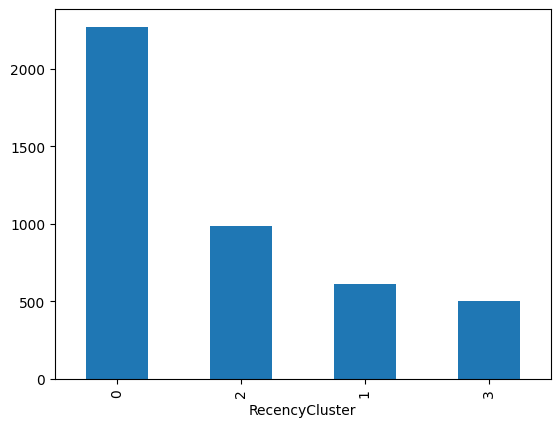

In [83]:
# Plotting the count of data in each cluster
user_df['RecencyCluster'].value_counts().plot.bar()

The data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. Hence, let's order them based on their mean values


In [84]:
# Creating a new dataframe by grouping the dataframe based on different cluster values and finding the mean
df_new = user_df.groupby("RecencyCluster")["Recency"].mean().reset_index()

# Displaying the new dataframe
df_new

,RecencyCluster,Recency
0,0,19.036532
1,1,191.032733
2,2,83.391260
3,3,308.968317


Segmenting Customers based on Frequency
Fitting the model object into the frequency values in our dataframe

In [85]:
# Renaming the Recency column name to RecencyMean
df_new.rename(columns={'Recency': 'RecencyMean'}, inplace=True)
df_new

,RecencyCluster,RecencyMean
0,0,19.036532
1,1,191.032733
2,2,83.391260
3,3,308.968317


In [86]:
# Sorting the values
df_new = df_new.sort_values(by="RecencyMean", ascending=False).reset_index(drop=True)
df_new

,RecencyCluster,RecencyMean
0,3,308.968317
1,1,191.032733
2,2,83.391260
3,0,19.036532



Now, we have the required value for scores for each of the cluster in the index of our column. Let's save them as RecencyScore

In [87]:
# Creating a new column called index with the index values
df_new['RecencyScore'] = df_new.index
df_new

,RecencyCluster,RecencyMean,RecencyScore
0,3,308.968317,0
1,1,191.032733,1
2,2,83.391260,2
3,0,19.036532,3


We have successfully segmented our customers and these segments can now help us in various processes of building the business such as sales and marketing


Next, let's merge the original user_df with the new dataframe to add the value of Recency score into our dataframe

In [88]:
# Merging the user_df with df_new based on the common 'RecencyCluster' column
df_user = pd.merge(user_df, df_new[["RecencyCluster", "RecencyScore"]], on="RecencyCluster")

# Removing the column for cluster
df_user.drop("RecencyCluster", axis=1, inplace=True)
# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore
0,18074.0,373,13,489.60,0
1,13747.0,373,1,79.60,0
2,12791.0,373,2,192.60,0
3,17908.0,373,58,243.28,0
4,16583.0,373,14,233.45,0


Reviewing the statistical metrics of the clusters

In [89]:
# Displaying the details of each cluster
df_user.groupby('RecencyScore')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyScore,,,,,,,,
0,505.0,308.968317,39.095414,251.0,274.0,305.0,351.0,373.0
1,611.0,191.032733,32.225266,138.0,164.0,189.0,217.0,250.0
2,984.0,83.391260,23.837368,52.0,63.0,77.0,101.0,137.0
3,2272.0,19.036532,14.683479,0.0,7.0,17.0,30.0,51.0


Segmenting Customers based on Frequency

Fitting the model object into the frequency values in our dataframe


In [90]:
# Fitting the model
kmeans.fit(df_user[['Frequency']])

KMeans(n_clusters=4)

In [91]:
# Predicting cluster using the fitted model
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyCluster
0,18074.0,373,13,489.60,0,0
1,13747.0,373,1,79.60,0,0
2,12791.0,373,2,192.60,0,0
3,17908.0,373,58,243.28,0,0
4,16583.0,373,14,233.45,0,0


Now, the customers has been segmented based on Recency into 4 different clusters

Next, let's see the distribution of data in the 4 clusters


<Axes: xlabel='FrequencyCluster'>

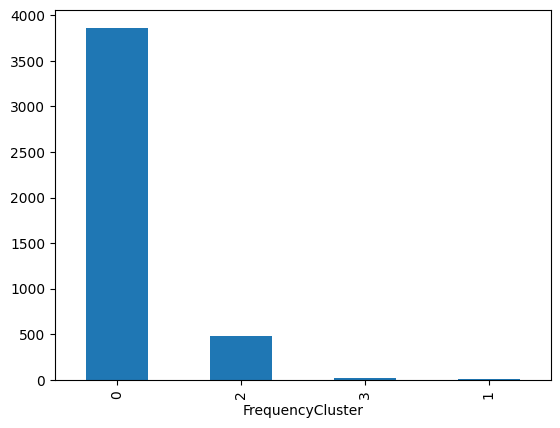

In [92]:
# Plotting the count of data in each cluster
df_user['FrequencyCluster'].value_counts().plot.bar()

The data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. Hence, let's order them based on their mean values

In [93]:
# Ordering cluster numbers
def order_cluster(cluster_name, column_name, df, ascending):
    """
    Order clusters based on their mean value
    """
    
    # Creating a new dataframe by grouping the dataframe based on different cluster values and finding the mean
    df_new = df.groupby(cluster_name)[column_name].mean().reset_index()
    
    # Sorting the values
    df_new = df_new.sort_values(by=column_name, ascending=ascending).reset_index(drop=True)
    
    # Creating a new column with the index values as Score
    new_column = column_name + "Score"
    df_new[new_column] = df_new.index
    
    # Creating a final dataframe by merging our original dataframe and the new dataframe
    df_final = pd.merge(df, df_new[[cluster_name, new_column]], on=cluster_name)
    
    # Removing the column for cluster
    df_final.drop(cluster_name, axis=1, inplace=True)
    
    return df_final   
    

In [94]:
# Ordering the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency', df_user, True)

# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore
0,18074.0,373,13,489.60,0,0
1,13747.0,373,1,79.60,0,0
2,12791.0,373,2,192.60,0,0
3,17908.0,373,58,243.28,0,0
4,16583.0,373,14,233.45,0,0


Reviewing the statistical metrics of the clusters

In [95]:
# Displaying the details of each cluster
df_user.groupby('FrequencyScore')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyScore,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,482.0,329.107884,132.670589,190.0,228.0,286.0,393.5,803.0
2,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
3,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0


Segmenting Customers based on Revenue

Fitting the model 
object into the revenue values in our dataframe


In [96]:
# Fitting the model
kmeans.fit(df_user[['Revenue']])


KMeans(n_clusters=4)

Predicting the value of clusters and saving them as a new column RevenueCluster in the dataframe

In [97]:
# Predicting cluster using the fitted model
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])

# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore,RevenueCluster
0,18074.0,373,13,489.60,0,0,3
1,13747.0,373,1,79.60,0,0,3
2,12791.0,373,2,192.60,0,0,3
3,17908.0,373,58,243.28,0,0,3
4,16583.0,373,14,233.45,0,0,3


Now, the customers has been segmented based on Revenue into 4 different clusters

Next, let's see the distribution of data in the 4 clusters

<Axes: xlabel='RevenueCluster'>

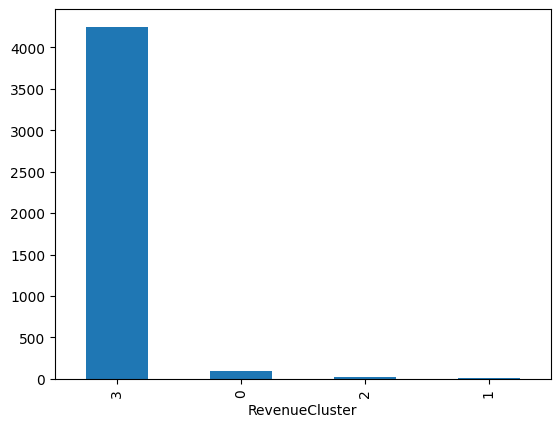

In [98]:
# Plotting the count of data in each cluster
df_user['RevenueCluster'].value_counts().plot.bar()


The data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. Hence, let's order them using "order_cluster" function

In [99]:
# Ordering the frequency cluster
df_user = order_cluster('RevenueCluster', 'Revenue', df_user, True)

# Displaying the first few rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore,RevenueScore
0,18074.0,373,13,489.60,0,0,0
1,13747.0,373,1,79.60,0,0,0
2,12791.0,373,2,192.60,0,0,0
3,17908.0,373,58,243.28,0,0,0
4,16583.0,373,14,233.45,0,0,0


Reviewing the statistical metrics of the clusters

In [100]:
# Displaying the details of each cluster
df_user.groupby('RevenueScore')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueScore,,,,,,,,
0,4249.0,1227.293333,1473.709347,0.00,303.7500,651.300,1553.4300,8814.41
1,100.0,16532.910300,8146.124780,8905.19,10747.6475,13433.655,19246.7550,41642.36
2,17.0,74287.308824,24271.640956,50568.13,60265.7800,67415.040,79183.5000,126103.61
3,6.0,231967.556667,73792.326136,154367.20,166712.9775,232247.760,276411.2925,336942.10


Finally, let's combine all the three values of score to compute the Overall RFM Score of each of the customers

In [101]:
# Calculating the overall score
df_user['OverallRFMScore'] = df_user['RecencyScore'] + df_user['FrequencyScore'] + df_user['RevenueScore']

# Printing the unique elements
df_user['OverallRFMScore'].unique()

array([0, 3, 1, 2, 4, 5, 6, 7, 8, 9])

<Axes: xlabel='OverallRFMScore'>

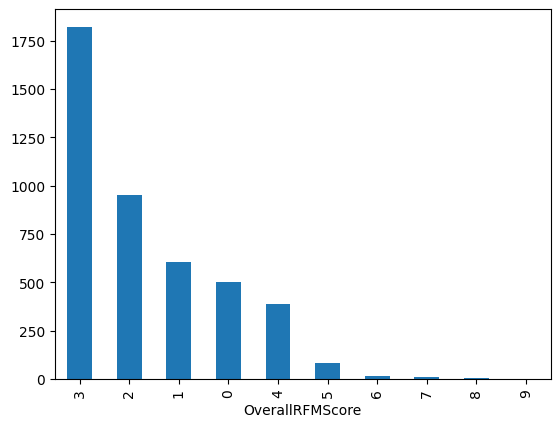

In [102]:
# Plotting a bar plot
df_user['OverallRFMScore'].value_counts().plot.bar()

In [103]:
# Grouping the OverallRFMScore column and getting the mean
df_user.groupby('OverallRFMScore')[['Recency', 'Frequency', 'Revenue']].mean()


,Recency,Frequency,Revenue
OverallRFMScore,,,
0,308.960159,22.324701,384.104602
1,191.647351,33.044702,602.481028
2,84.292017,45.504202,922.563521
3,22.510428,69.364435,1470.724946
4,13.349741,308.111399,4554.651036
5,8.246914,499.888889,16070.467160
6,7.461538,886.923077,69586.396154
7,2.555556,2432.555556,103828.237778
8,2.000000,3606.500000,177065.845000


According to the bar plot and mean table, it is evident that the majority of the data values seem to have a RFM Score of 3, followed by 2 and 1
- A low RFM Score means that the customers have a low value of recency, are less frequent, and generate low revenue
- A high RFM Score means that the customers have a high value of recency, are more frequent, and generate higher revenue

**Segmenting Customers based on Overall RFM Score**

Let's segment the customer into three groups based on overall RFM Score

Low-value
Mid-value
High-value

<Axes: xlabel='Segment'>

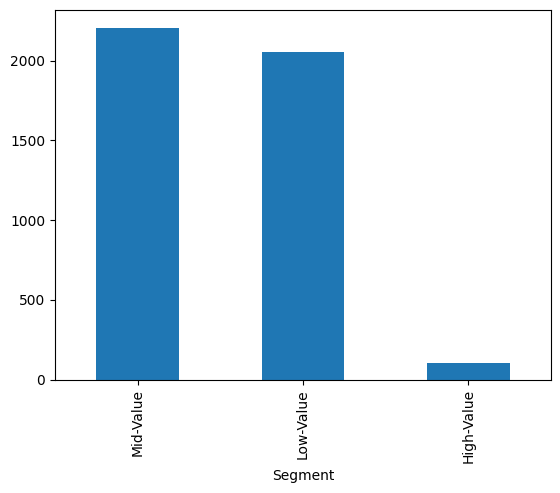

In [104]:
# Segmenting the customers based on overall score
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallRFMScore']>2, 'Segment'] = 'Mid-Value'
df_user.loc[df_user['OverallRFMScore']>4, 'Segment'] = 'High-Value'

# Plotting a bar plot
df_user['Segment'].value_counts().plot.bar()

It can be seen that we have a large amount of low and mid-value customers but very less amount of high-value customers. This segmentation can help us determine the kind of strategies and approaches needed for improving sales and profit, which will allow us to increase the number of high-value customers and their retention.

Let's plot the customer groups and view their segmentations visually

Text(0, 0.5, 'Revenue')

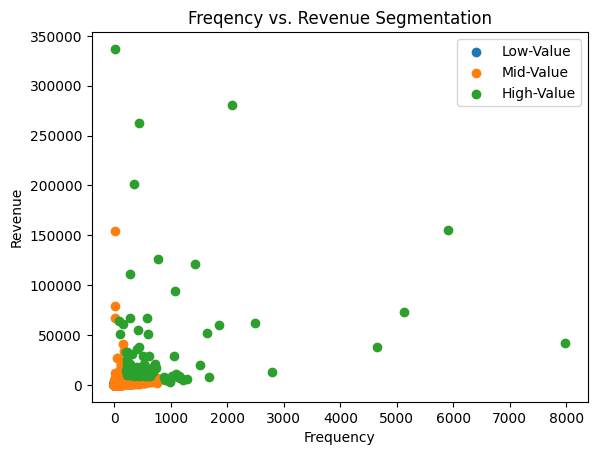

In [105]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Frequency'],
            y=df_user.query("Segment == 'Low-Value'")['Revenue'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Frequency'],
            y=df_user.query("Segment == 'Mid-Value'")['Revenue'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Frequency'],
            y=df_user.query("Segment == 'High-Value'")['Revenue'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Freqency vs. Revenue Segmentation")
plt.xlabel("Frequency")
plt.ylabel("Revenue")

**Recency vs. Revenue**

Text(0, 0.5, 'Revenue')

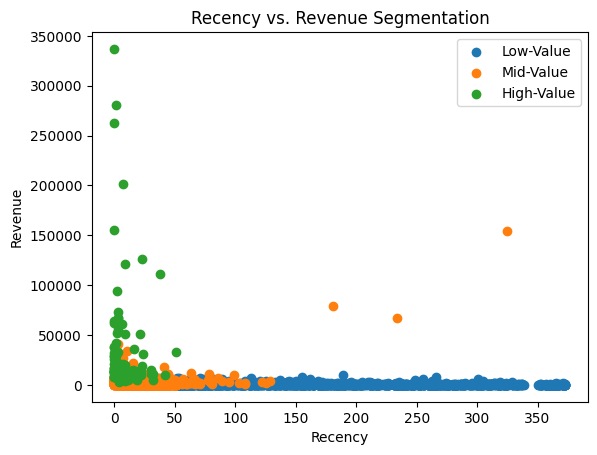

In [106]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
            y=df_user.query("Segment == 'Low-Value'")['Revenue'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
            y=df_user.query("Segment == 'Mid-Value'")['Revenue'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
            y=df_user.query("Segment == 'High-Value'")['Revenue'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Recency vs. Revenue Segmentation")
plt.xlabel("Recency")
plt.ylabel("Revenue")

**Recency vs. Frequency**


Text(0, 0.5, 'Frequency')

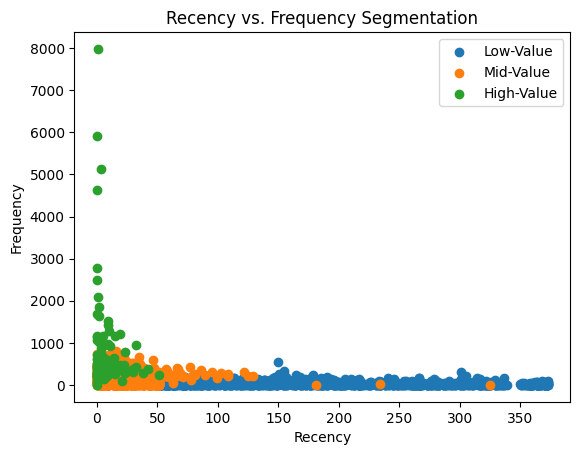

In [107]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
            y=df_user.query("Segment == 'Low-Value'")['Frequency'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
            y=df_user.query("Segment == 'Mid-Value'")['Frequency'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
            y=df_user.query("Segment == 'High-Value'")['Frequency'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Recency vs. Frequency Segmentation")
plt.xlabel("Recency")
plt.ylabel("Frequency")

**Revenue vs. Frequency**

Text(0, 0.5, 'Frequency')

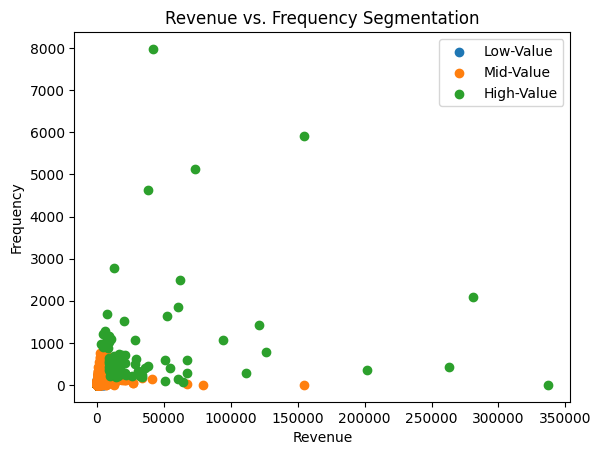

In [108]:
# Scatter plot of low-value customers
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Revenue'],
            y=df_user.query("Segment == 'Low-Value'")['Frequency'], label="Low-Value")

# Scatter plot of mid-value customers
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Revenue'],
            y=df_user.query("Segment == 'Mid-Value'")['Frequency'], label="Mid-Value")

# Scatter plot of high-value customers
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Revenue'],
            y=df_user.query("Segment == 'High-Value'")['Frequency'], label="High-Value")

# Easy visualization
plt.legend(loc="upper right")
plt.title("Revenue vs. Frequency Segmentation")
plt.xlabel("Revenue")
plt.ylabel("Frequency")

We have successfully segmented our customers and these segments can now help us in various processes of building the business such as sales and marketing
